# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [48]:
# Tampilkan 10 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1eMfU0lb3o8X25lLM-pPP55ka8isGwIBA'
df = pd.read_csv(url)

df.head(10)

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471
5,2024-01-19,620,Oats,Grains,387,31.2,6.8,39.5,5.1,0.7,300,244,Dinner,727
6,2024-07-27,714,Carrot,Vegetables,138,28.2,12.4,20.2,2.8,37.8,933,15,Dinner,733
7,2024-10-21,992,Cookies,Snacks,69,36.8,17.8,15.0,9.6,36.4,185,228,Snack,386
8,2024-07-23,535,Apple,Fruits,568,6.7,7.0,23.4,6.4,46.9,336,129,Breakfast,931
9,2024-09-08,594,Quinoa,Grains,204,19.3,62.7,31.8,6.8,40.3,887,135,Snack,662


In [49]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [50]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [51]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [52]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [53]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [54]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
Date,0
User_ID,0
Food_Item,0
Category,0
Calories (kcal),0
Protein (g),0
Carbohydrates (g),0
Fat (g),0
Fiber (g),0
Sugars (g),0


In [55]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [56]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()
df[['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
    'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)']] = scaler.fit_transform(
    df[['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
        'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)']])

In [57]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
df = pd.get_dummies(df, columns=['Meal_Type', 'Category'])

In [58]:
# Melakukan drop pada kolom yang memiliki keterangan id
df = df.drop(columns=['User_ID', 'Date', 'Food_Item'])

In [59]:
df.head()

,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml),Meal_Type_Breakfast,Meal_Type_Dinner,Meal_Type_Lunch,Meal_Type_Snack,Category_Beverages,Category_Dairy,Category_Fruits,Category_Grains,Category_Meat,Category_Snacks,Category_Vegetables
0,0.223636,0.844898,0.828421,0.010204,0.15,0.254,0.752,0.416667,0.420000,False,False,True,False,False,False,False,False,True,False,False
1,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,0.406667,False,False,True,False,False,False,True,False,False,False,False
2,0.320000,0.532653,0.780000,0.506122,0.32,0.894,0.295,0.523333,0.594444,True,False,False,False,False,False,False,False,True,False,False
3,0.120000,0.865306,0.443158,0.308163,0.65,0.882,0.307,0.043333,0.310000,False,False,False,True,False,False,True,False,False,False,False
4,0.818182,0.671429,0.745263,0.938776,0.78,0.388,0.358,0.493333,0.412222,False,False,True,False,False,False,True,False,False,False,False


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [60]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [61]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [62]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [63]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [78]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()



,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.504898,0.500470,0.500722,0.498721,0.498694,0.501051,0.497969,0.506289,0.504837
std,0.287627,0.288408,0.288286,0.288680,0.286498,0.289612,0.287988,0.291202,0.289975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254545,0.248980,0.250526,0.251020,0.250000,0.250000,0.249750,0.253333,0.252222
50%,0.505455,0.500000,0.503158,0.495918,0.500000,0.500000,0.495000,0.510000,0.506111
75%,0.752727,0.748980,0.751579,0.746939,0.750000,0.754000,0.749000,0.760000,0.758889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


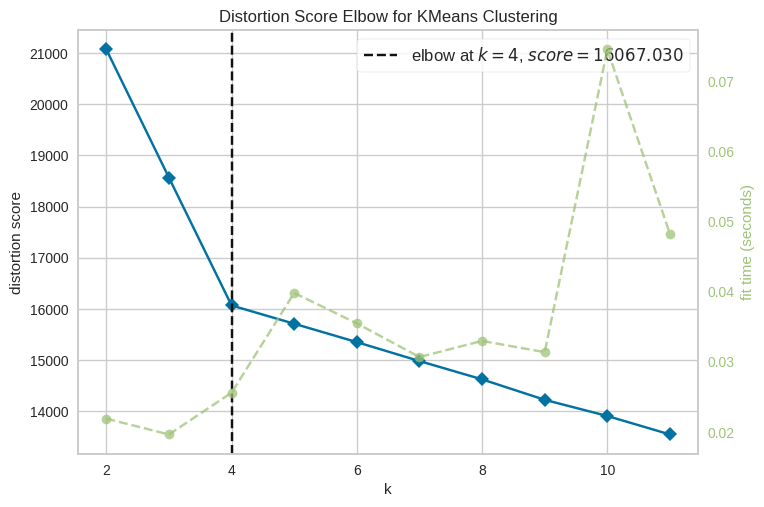

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df)
visualizer.show()

In [85]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Sesuaikan jumlah cluster sesuai Elbow Method
df['Cluster'] = kmeans.fit_predict(df)

Jalankan cell code ini untuk menyimpan model kamu.

In [86]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [68]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [69]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [70]:
# Membangun model menggunakan PCA.

In [71]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [82]:
# Interpretasi hasil clustering
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Analisis lebih lanjut untuk setiap cluster
for i in range(3):  # Jumlah cluster yang dipilih
    print(f"Cluster {i} - Rata-rata:")
    print(cluster_summary.iloc[i])
    print("\n")


         Calories (kcal)  Protein (g)  Carbohydrates (g)   Fat (g)  Fiber (g)  \
Cluster                                                                         
0               0.507435     0.500176           0.497519  0.501880   0.493394   
1               0.511448     0.498104           0.501473  0.498905   0.506293   
2               0.493012     0.503480           0.506573  0.492013   0.501930   

         Sugars (g)  Sodium (mg)  Cholesterol (mg)  Water_Intake (ml)  \
Cluster                                                                 
0          0.504774     0.497989          0.509129           0.506974   
1          0.501102     0.494116          0.511130           0.502796   
2          0.493311     0.501838          0.495511           0.502496   

         Meal_Type_Breakfast  Meal_Type_Dinner  Meal_Type_Lunch  \
Cluster                                                           
0                   0.505531          0.494469              0.0   
1                   0.00000

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [87]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_scaled['Target'] = kmeans.fit_predict(df_scaled)


NameError: name 'df_scaled' is not defined

In [74]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [75]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [76]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [77]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)